Customer Distribution by Region:
Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


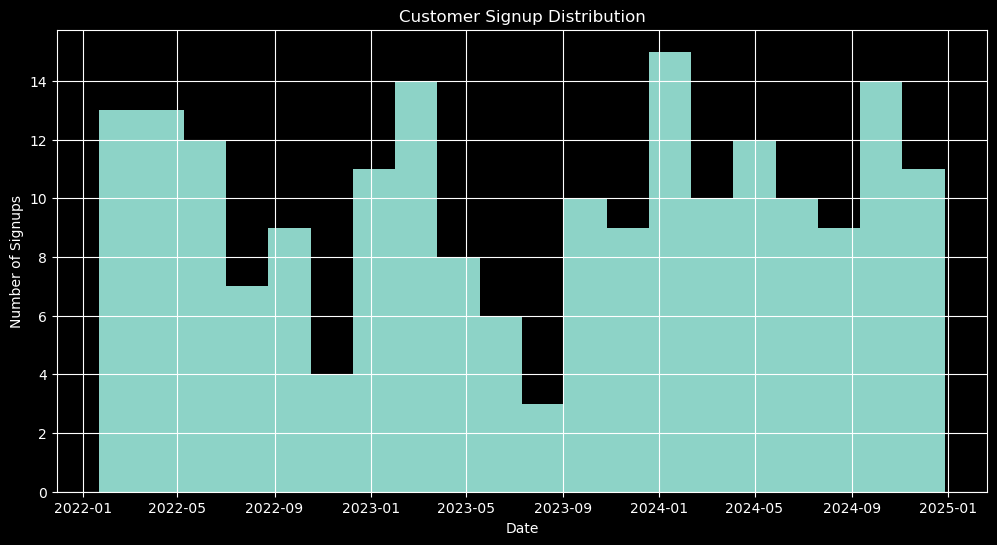


Product Category Distribution:
Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64

Price Statistics by Category:
             count        mean         std    min       25%     50%       75%  \
Category                                                                        
Books         26.0  292.212308  153.800135  33.59  154.2975  337.94  419.2125   
Clothing      25.0  263.720000  157.965038  18.82  126.3400  303.50  389.2000   
Electronics   26.0  275.353462  137.056612  16.08  168.8000  282.72  394.3650   
Home Decor    23.0  235.020000  122.236552  41.18  142.3800  235.58  314.9750   

                max  
Category             
Books        497.76  
Clothing     481.78  
Electronics  459.86  
Home Decor   454.53  

Key Business Metrics:
Total Revenue: $689,995.56
Average Order Value: $690.00
Total Customers: 200
Total Products: 100
Total Transactions: 1000


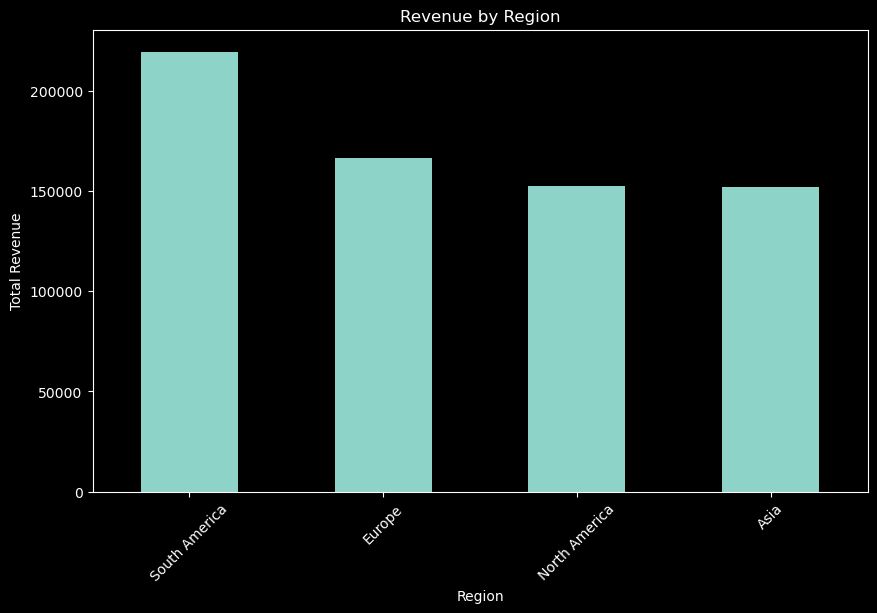


Top 10 Selling Products:
ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
ActiveWear Jacket         76
BookWorld Biography       71
TechPro T-Shirt           66
SoundWave Desk Lamp       64
TechPro Textbook          62
Name: Quantity, dtype: int64


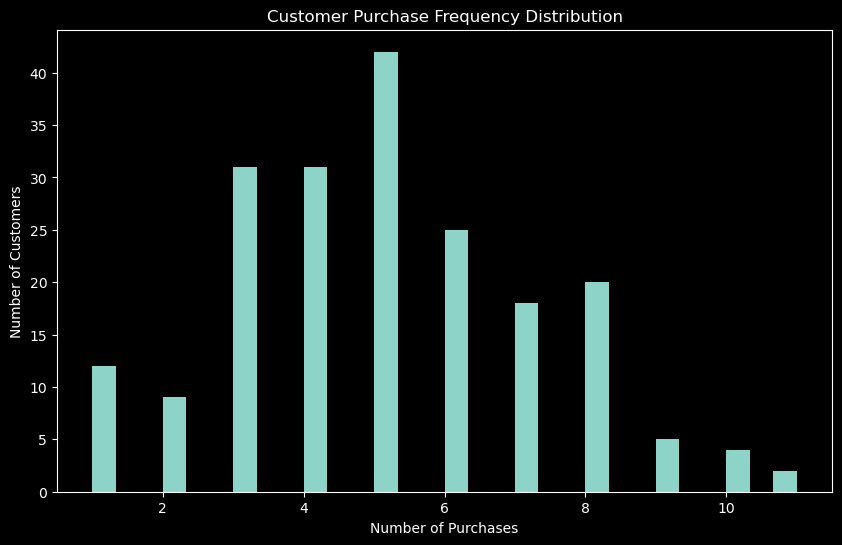

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Read the CSV files
customers_df = pd.read_csv('Customers.csv')
products_df = pd.read_csv('Products.csv')
transactions_df = pd.read_csv('Transactions.csv')

# Convert date columns to datetime
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

# Basic EDA for Customers
print("Customer Distribution by Region:")
print(customers_df['Region'].value_counts())

# Customer signup trends
plt.figure(figsize=(12, 6))
customers_df['SignupDate'].hist(bins=20)
plt.title('Customer Signup Distribution')
plt.xlabel('Date')
plt.ylabel('Number of Signups')
plt.show()

# Product Analysis
print("\nProduct Category Distribution:")
print(products_df['Category'].value_counts())

print("\nPrice Statistics by Category:")
print(products_df.groupby('Category')['Price'].describe())

# Transaction Analysis
# Merge transactions with customer and product information
full_transactions = transactions_df.merge(customers_df, on='CustomerID')\
                                 .merge(products_df, on='ProductID')

# Calculate key metrics
total_revenue = transactions_df['TotalValue'].sum()
avg_order_value = transactions_df['TotalValue'].mean()
total_customers = len(customers_df)
total_products = len(products_df)
total_transactions = len(transactions_df)

print(f"\nKey Business Metrics:")
print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Average Order Value: ${avg_order_value:.2f}")
print(f"Total Customers: {total_customers}")
print(f"Total Products: {total_products}")
print(f"Total Transactions: {total_transactions}")

# Revenue by Region
revenue_by_region = full_transactions.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
revenue_by_region.plot(kind='bar')
plt.title('Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

# Top selling products
top_products = full_transactions.groupby('ProductName')['Quantity'].sum()\
                               .sort_values(ascending=False).head(10)
print("\nTop 10 Selling Products:")
print(top_products)

# Customer purchase frequency
customer_frequency = transactions_df['CustomerID'].value_counts()
plt.figure(figsize=(10, 6))
plt.hist(customer_frequency, bins=30)
plt.title('Customer Purchase Frequency Distribution')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.show()